# Predicción Del Cáncer De Mama

El cáncer de mama es el crecimiento descontrolado de las células mamarias. Para entender mejor el cáncer de mama, debemos entender cómo se desarrolla cualquier cáncer.

El cáncer es el resultado de mutaciones, o cambios anómalos, en los genes que regulan el crecimiento de las células y las mantienen sanas. Los genes se encuentran en el núcleo de las células, el cual actúa como la “sala de control” de cada célula. Normalmente, las células del cuerpo se renuevan mediante un proceso específico llamado crecimiento celular: las células nuevas y sanas ocupan el lugar de las células viejas que mueren. Pero con el paso del tiempo, las mutaciones pueden “activar” ciertos genes y “desactivar” otros en una célula. La célula modificada adquiere la capacidad de dividirse sin ningún tipo de control u orden, por lo que produce más células iguales y genera un tumor.


Un tumor puede ser benigno (no es peligroso para la salud) o maligno (es potencialmente peligroso). Los tumores benignos no son considerados cancerosos: sus células tienen una apariencia casi normal, crecen lentamente y no invaden tejidos próximos ni se propagan hacia otras partes del cuerpo. Los tumores malignos son cancerosos. De no ser controladas, las células malignas pueden propagarse más allá del tumor original hacia otras partes del cuerpo.

* El Dataset que se utilizará corresponde a Wiscousin Breast Cancer

## Importamos librerías

In [1]:
# Manipulacion de los datos
import pandas as pd
import numpy as np

# Visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
plt.style.use("ggplot")

# Machine learning
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


# No presentar advertencias
import warnings
warnings.filterwarnings("ignore")

* Carga del Dataset

In [2]:
data = datasets.load_breast_cancer()
pd.set_option("display.max_columns",None) # Visualizar todas las columnas
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Exploreción de los datos

In [3]:
# Visualizamos la dimension del dataset
df.shape

(569, 31)

In [4]:
# Visualizamos los nombres de las columnas
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

* Mostramos una información general de los datos:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

* Análisis de valores faltantes:

In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
# Si de desea eliminar alguna columna en particular:
# df = df.drop(["id","Unnamed: 32"],axis=1)

* Estadístcia descriptiva de los datos

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Correlación de Pearson

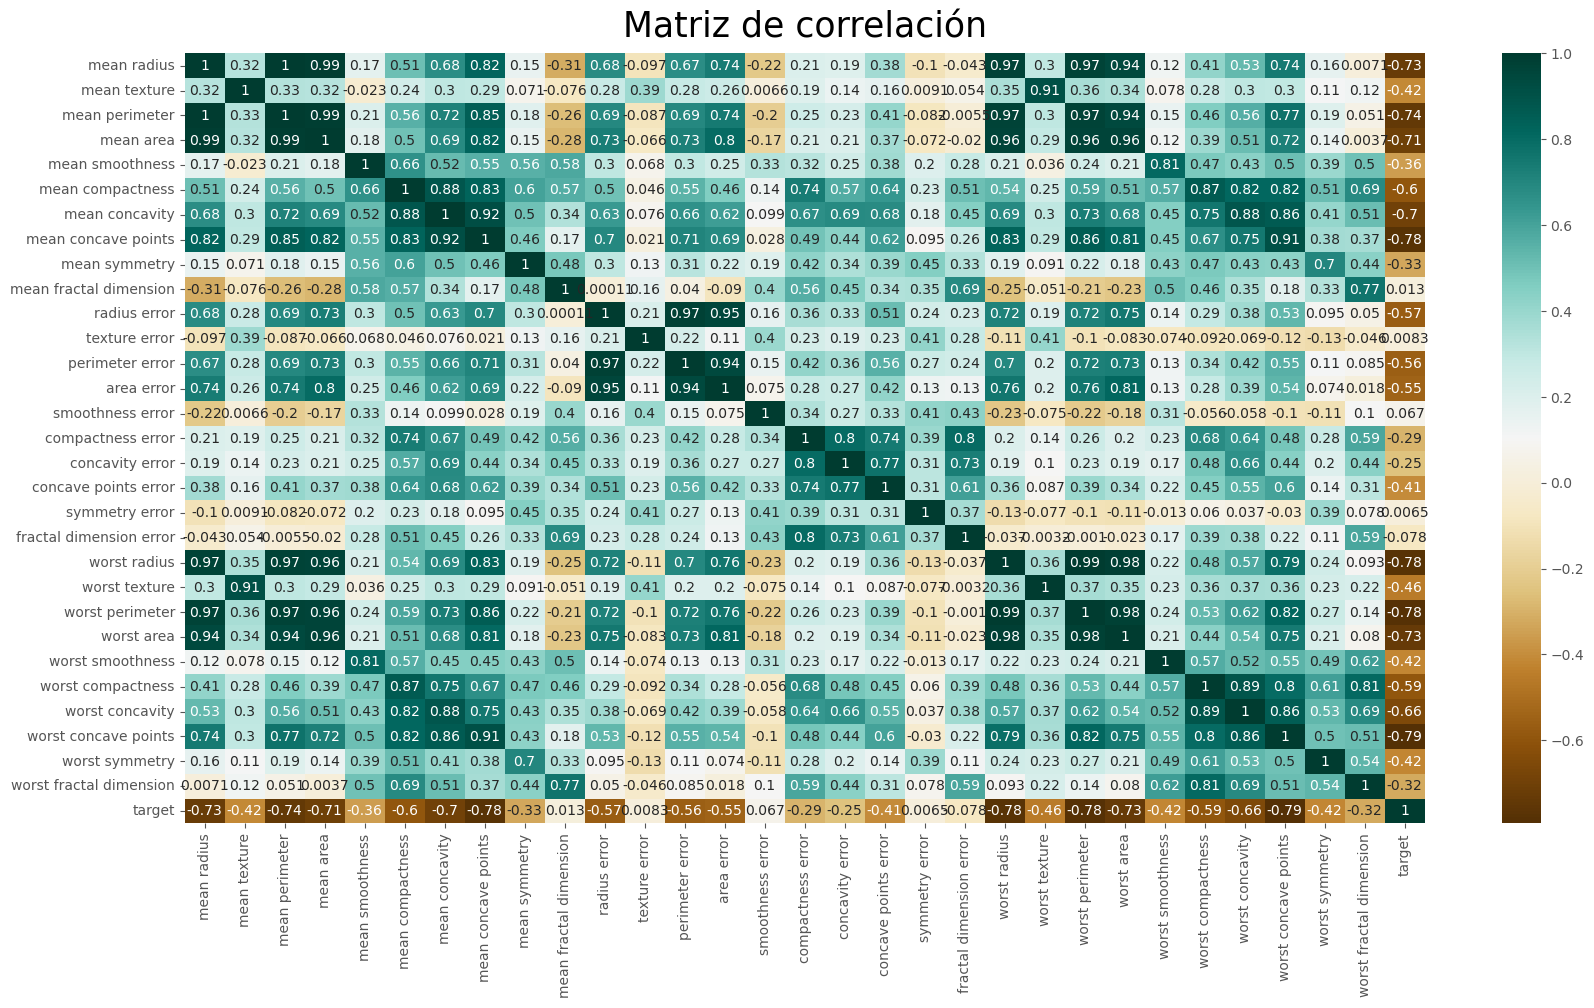

In [9]:
# Matriz de corr
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df.corr(),cmap="BrBG",annot=True)

heatmap.set_title("Matriz de correlación", fontdict={"fontsize":25},pad=12);

**Matriz de correlación mostrando únicamente los valores con correlación positiva**

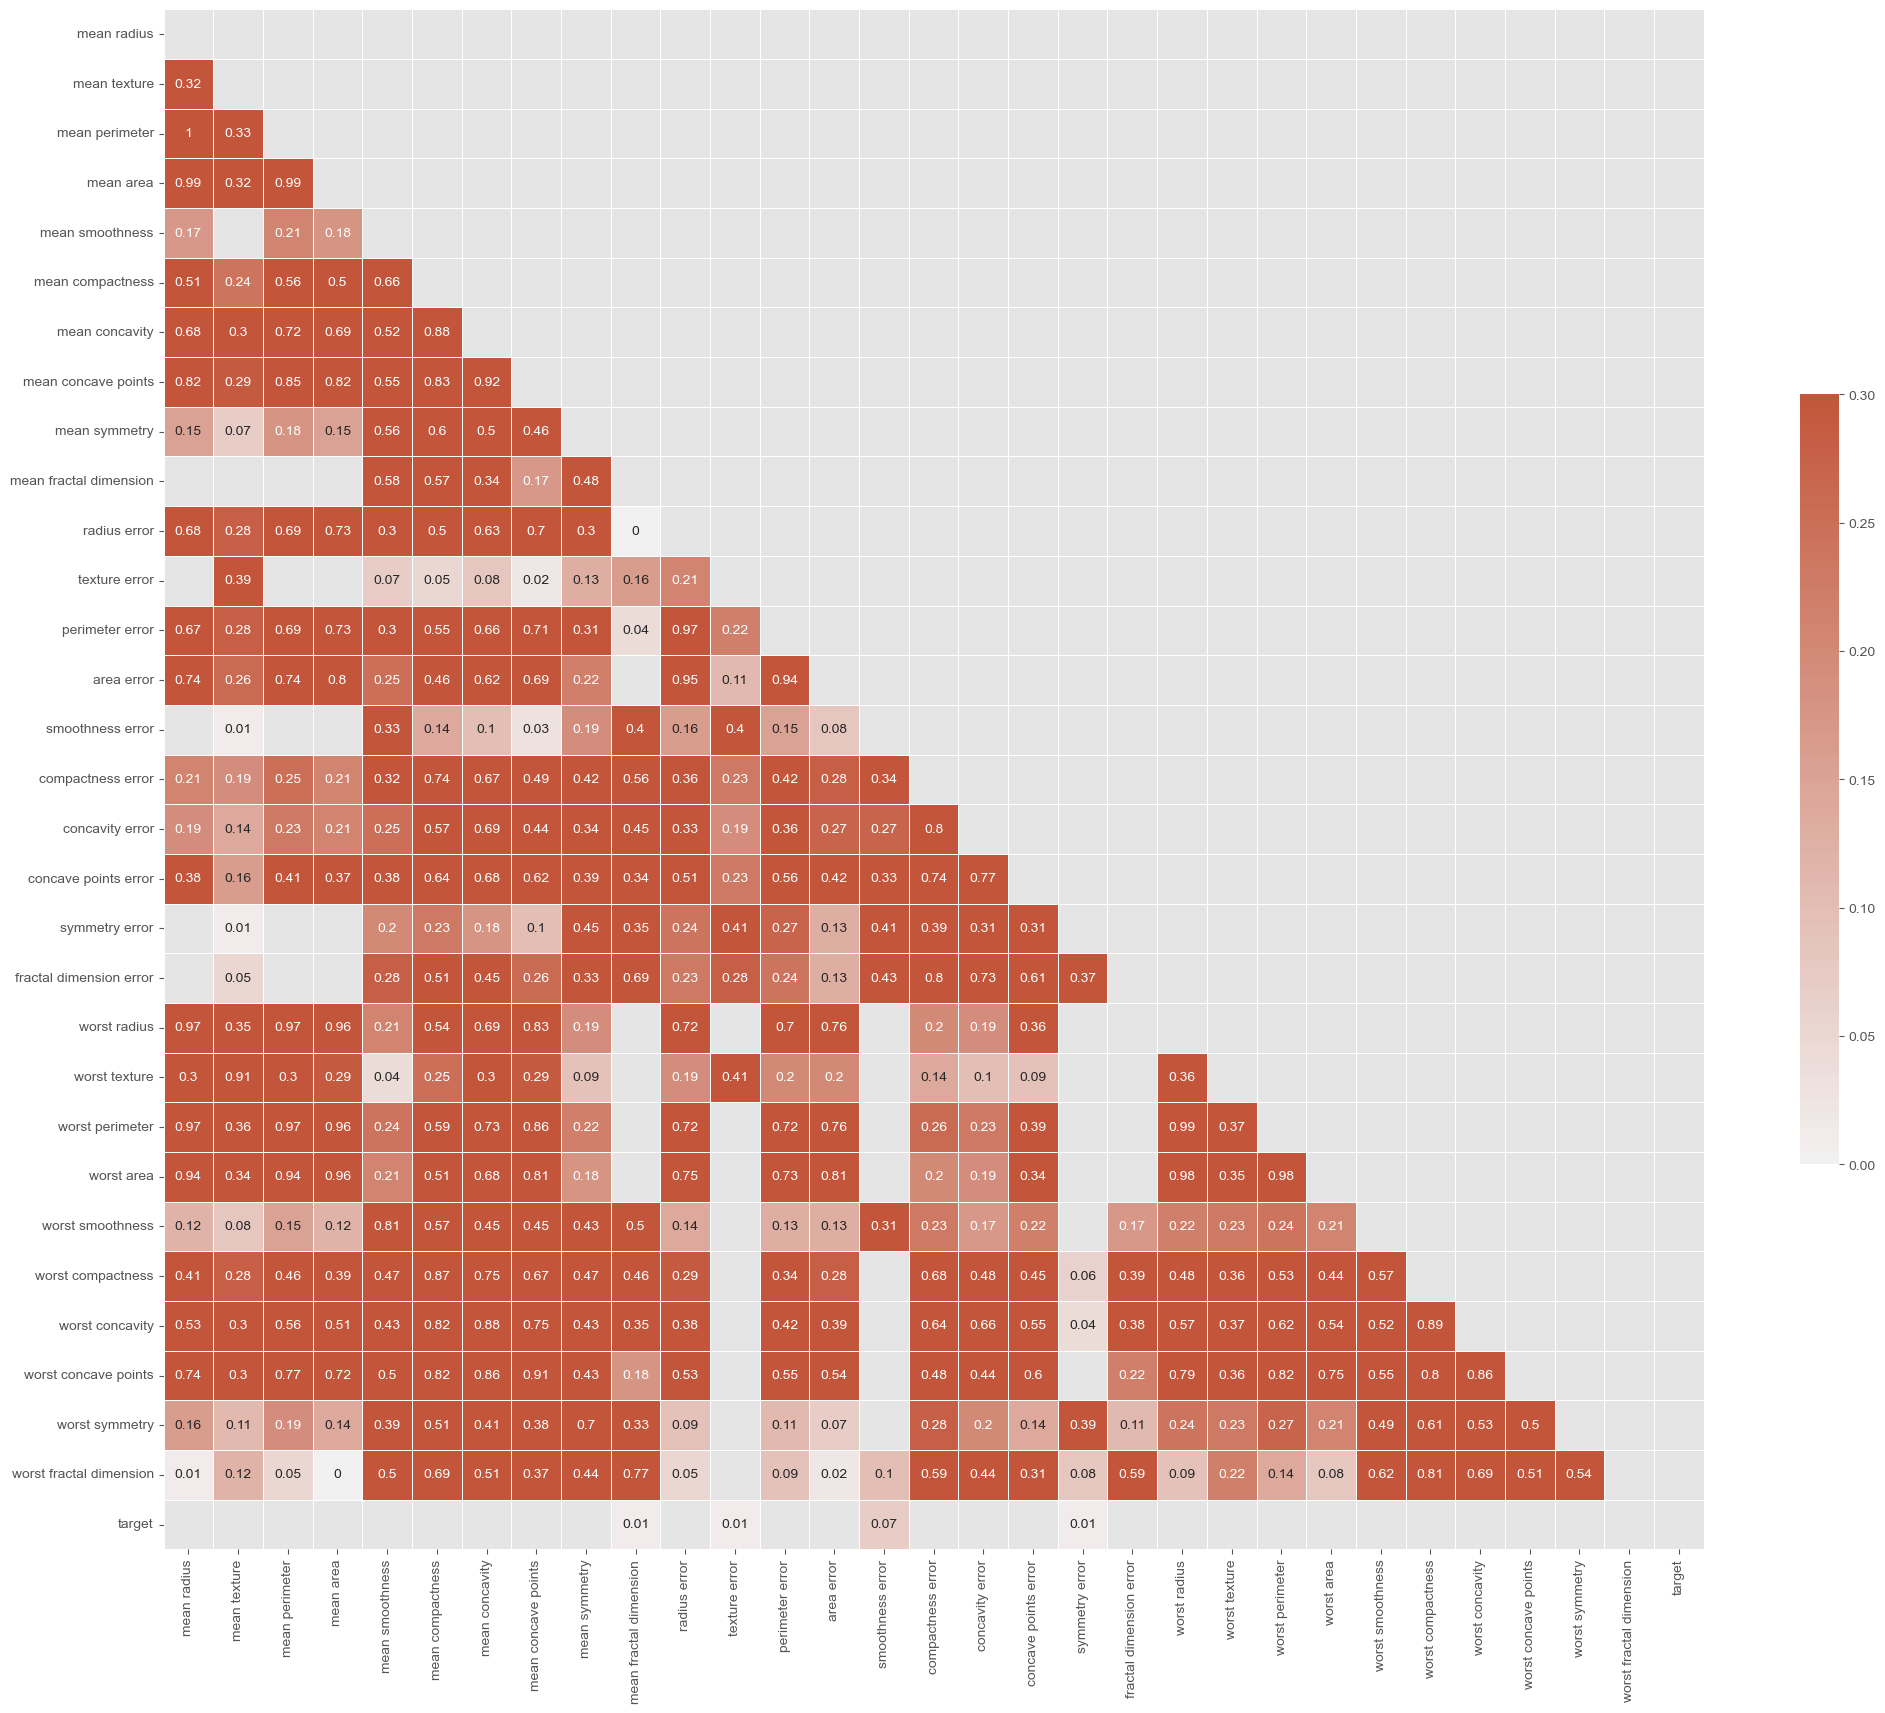

In [83]:
#Correlation Heatmap showing only those values that have a positive correlation
corr = df.corr()
corr = np.around(corr[corr > 0.0],2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25,20))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
sns.set_style("white")
plt.show()

# Analicemos número de valores para el tipo de cáncer maligno y benigno

In [10]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

De donde se tiene en cuenta que:
* 1: Benigno
* 0: Maligno

In [11]:
print("Total número de diagnosticados ", str(df.shape[0]), ", ",
     df.target.value_counts()[1],"Benigno y Maligno son",
     df.target.value_counts()[0])

Total número de diagnosticados  569 ,  357 Benigno y Maligno son 212


Vamos a visualizar la variable target:

In [81]:
fig = px.histogram(df, 
                   x='target',
                   color = 'target',
                   text_auto=True,
                   color_discrete_sequence=px.colors.qualitative.G10,
                   template='simple_white',
                   labels={"target": "Target"},
                   title='Target Value Maligno=0/Benigno=1')

fig.update_layout(bargap=0.1, xaxis_title="Target",yaxis_title="Count")

fig.show()

## Trazar la distribución de cada tipo de diagnóstico para algunas de las características medias

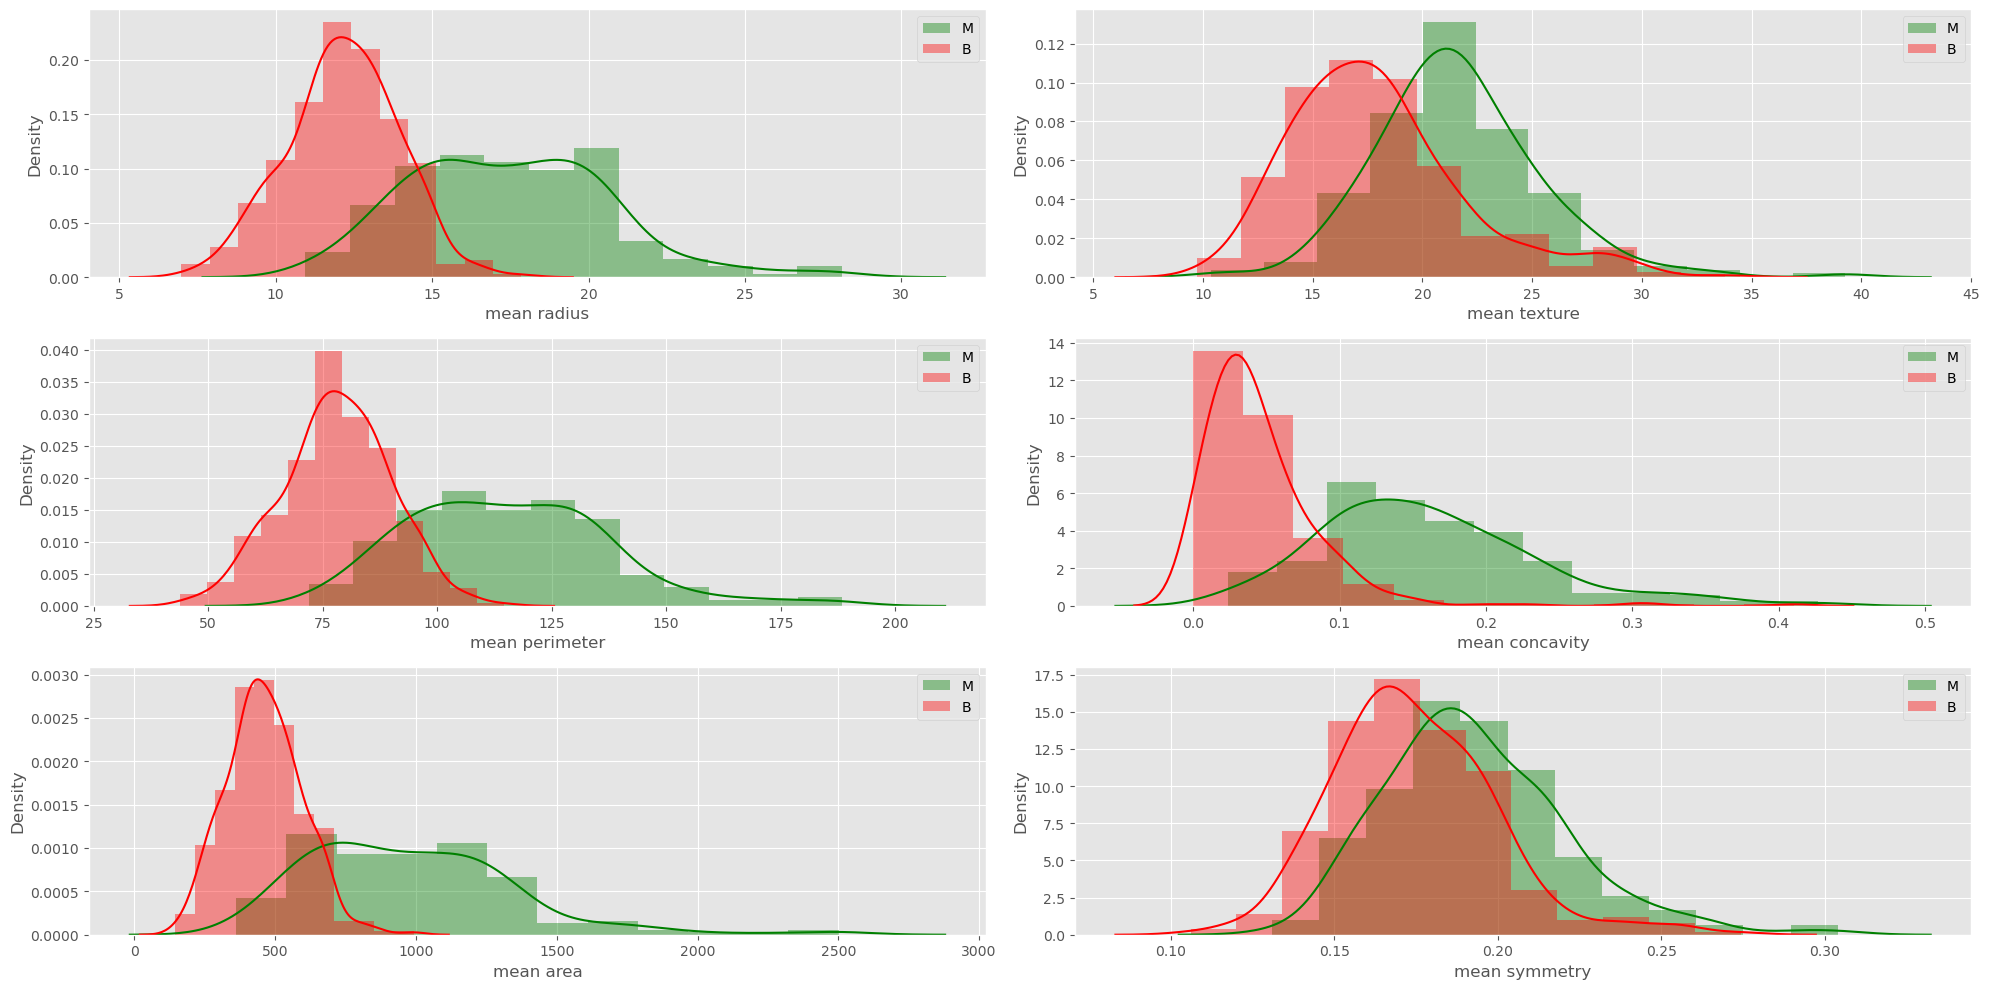

In [13]:
# Revisamos la distribución de las variables
bins = 12
fig, axes = plt.subplots(2,3,figsize=(20,10))
plt.subplot(3,2,1)
sns.distplot(df[df["target"]==0]["mean radius"],bins=bins,color="green",
            label="M")
sns.distplot(df[df["target"]==1]["mean radius"],bins=bins,color="red",
            label="B")
plt.legend(loc="upper right")
plt.subplot(3,2,2)
sns.distplot(df[df["target"]==0]["mean texture"],bins=bins,color="green",
            label="M")
sns.distplot(df[df["target"]==1]["mean texture"],bins=bins,color="red",
            label="B")
plt.legend(loc="upper right")
plt.subplot(3,2,3)
sns.distplot(df[df["target"]==0]["mean perimeter"],bins=bins,color="green",
            label="M")
sns.distplot(df[df["target"]==1]["mean perimeter"],bins=bins,color="red",
            label="B")
plt.legend(loc="upper right")
plt.subplot(3,2,4)
sns.distplot(df[df["target"]==0]["mean concavity"],bins=bins,color="green",
            label="M")
sns.distplot(df[df["target"]==1]["mean concavity"],bins=bins,color="red",
            label="B")
plt.legend(loc="upper right")
plt.subplot(3,2,5)
sns.distplot(df[df["target"]==0]["mean area"],bins=bins,color="green",
            label="M")
sns.distplot(df[df["target"]==1]["mean area"],bins=bins,color="red",
            label="B")
plt.legend(loc="upper right")
plt.subplot(3,2,6)
sns.distplot(df[df["target"]==0]["mean symmetry"],bins=bins,color="green",
            label="M")
sns.distplot(df[df["target"]==1]["mean symmetry"],bins=bins,color="red",
            label="B")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [75]:
fig = px.histogram(df, 
                   x='mean area', 
                   marginal='violin', 
                   text_auto=True,
                   color_discrete_sequence=['mediumslateblue'], 
                   template='simple_white',
                   labels={"mean area": "Mean Area"},
                   title='Cancer Mean Area Distribution')

fig.update_layout(xaxis_title="Mean Area ",yaxis_title="Count", bargap=0.1)

fig.show()

* Observemos cómo se comporta la variable textura según la variable target que determina si es benigno o maligno:

In [76]:
fig = px.scatter(df, 
                   x='mean texture', 
                   color='target',
                 size='mean texture',
                   template='simple_white', 
                   title='Cancer Mean Texture Spread',
                 labels={"mean texture": "Mean Texture", "target":"Target"},
                hover_data=["target"])

fig.update_layout(xaxis_title="Mean Texture",yaxis_title=" ")

fig.show()

* Variable mean compactness:

In [77]:
for template in ["seaborn"]:
    fig = px.scatter(df,
                     x="mean compactness", 
                     size="mean compactness",
                     color="mean compactness",
                      labels={"mean compactness": "Mean Compactness"},
                     hover_data=["target"],
                     template=template, 
                     title="Cancer Compactness Mean")
    fig.update_layout(xaxis_title="Mean Compactness",yaxis_title=" ")
    fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'},)
    fig.show()

* Variable mean concave points con target:

In [78]:
for template in ["ggplot2"]:
    fig = px.scatter(df,
                     x="mean concave points", 
                     size='mean concave points',
                     color="mean concave points", 
                     hover_data=["target"],
                     template=template, 
                     labels={"mean concave points": "Mean Concave Points"},
                     title="Mean Concave Points Spread")
    fig.update_layout(xaxis_title="Mean concave points",yaxis_title=" ")
    fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'}, bargap=0.1)
    fig.update_xaxes(showgrid=True)
    #fig.update_yaxes(showgrid=False)
    fig.show()

Se puede observar la distribución con respecto a si son malignos o benignos, con un enfoque exploratorio.

In [ ]:
# Si la variable respuesta fuesen letras como: M - B
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#df["target"]=le.fit_transform(df["target"])

Se planea utilizar **Análisis De Componentes Principales** o PCA con el fin de reducir un poco la dimensionalidad del dataset. 

Se transforma el conjunto de variables en uno más pequeño que aun contiene la mayor parte del conjunto grande. Es muy flexible, pudiendo contener multicolinealidad, valores perdidos, datos categóricos, etc.

**Objetivo** Reducir la cantidad de varables de un dataset mientras se conserva la mayor cantidad de información posible, es decir, consevamos la mayor cantidad de varianza implicada. 

In [14]:
# Estandarización del dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)

Una vez escalados los datos, se procede a aplicar PCA

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Queremos 2 componentes principales
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [16]:
scaled_data.shape, x_pca.shape

((569, 31), (569, 2))

Se logra evidenciar la reducción aplicada, donde los datos escalados originales tienen las 31 variables, mientras que luego de aplicar PCA tiene solo las 2 componentes principales. Ahora transformamos el array a un dataFrame!

In [17]:
pca_df = pd.DataFrame(data=x_pca,columns=["principal component 1",
                                         "principal component 2"])
pca_df

,principal component 1,principal component 2
0,9.225770,2.116196
1,2.655802,-3.784776
2,5.892492,-1.005579
3,7.135401,10.318716
4,4.129423,-1.905579
...,...,...
564,6.593983,-3.454947
565,4.024833,-3.556006
566,1.530077,-1.958871
567,10.405008,1.849078


## Visualizando el PCA

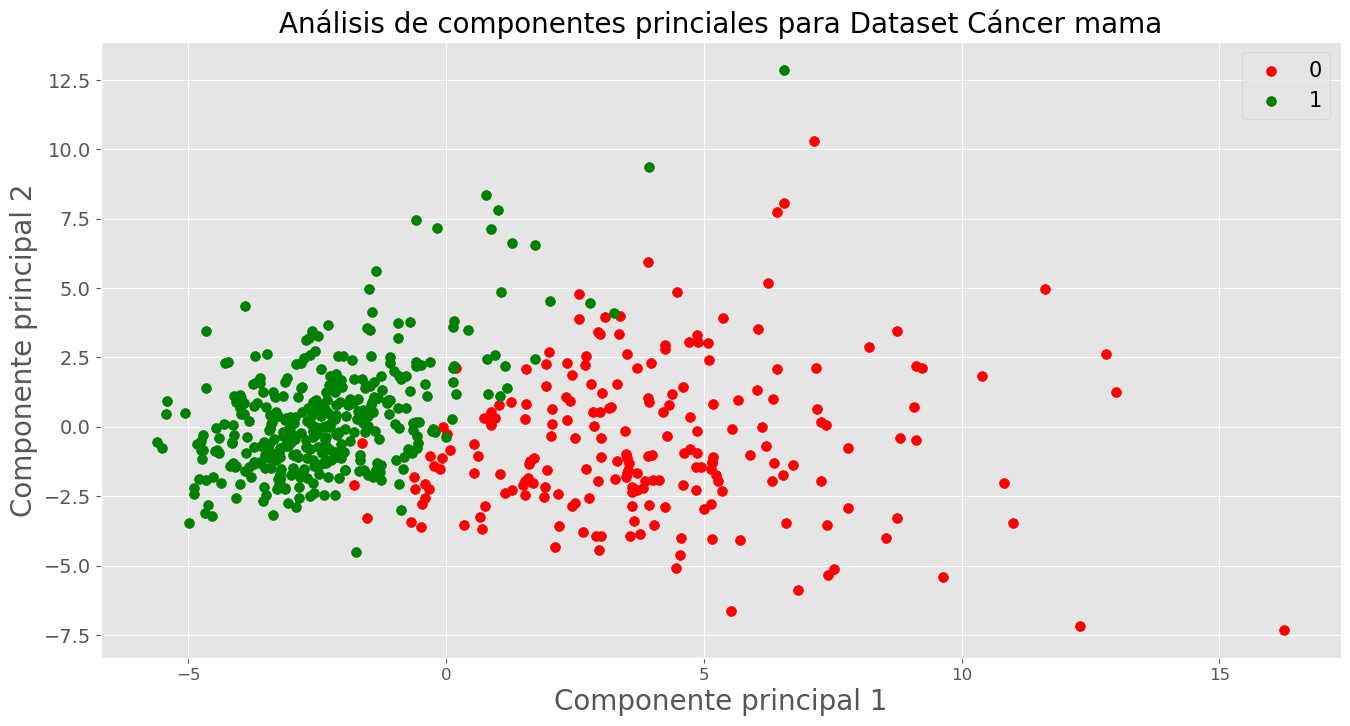

In [18]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel("Componente principal 1",fontsize=20)
plt.ylabel("Componente principal 2",fontsize=20)
plt.title("Análisis de componentes princiales para Dataset Cáncer mama",
         fontsize=20)
targets = [0,1]
colors = ["r","g"]
for target, color in zip(targets,colors):
    indicesTokeep = df["target"] == target
    plt.scatter(pca_df.loc[indicesTokeep,"principal component 1"]
               , pca_df.loc[indicesTokeep,"principal component 2"],
               c=color,s=50)
plt.legend(targets,prop={"size":15})

Se logra ver la distribución de las componentes principales por el cáncer de mama

## División del variables independientes y dependiente

In [19]:
X = df.drop("target",axis=1)
y = df["target"]

In [20]:
len(X.columns)

30

## División de los datos en entrenamiento y validación

In [21]:
# Separando 20% del dataset para prueba!
# 80% para entrenamiento
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=42)
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (455, 30)
Shape of test set: (114, 30)


Se procede a **escalar** los datos nuevamente, con el fin de tener los datos de entrenamiento y validación escalados!

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

StandardScaler estandariza una función restando la media y luego escalando a la varianza de la unidad (Dividir todos los valores por la desviación estándar)

## Implementación de Modelos

#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Entrenamos el modelo
lr.fit(X_train,y_train)

# Predicciones
Y_lr = lr.predict(X_test)

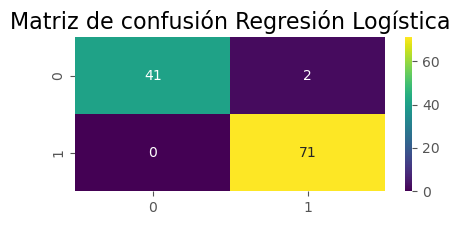

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize=(5,2))
plt.title("Matriz de confusión Regresión Logística", fontsize=16)
sns.heatmap(confusion_matrix(y_test,Y_lr),annot=True,
           cmap="viridis",fmt=".0f")
plt.show();

Los que se han clasificado como benigno cuando en realidad eran maligno son **2**, los cuales registran como las únicas predicciones erróneas. La clasificación fue bastante buena!

In [25]:
print(classification_report(y_test,Y_lr))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [59]:
precision_lr = precision_score(y_test,Y_lr)
print("Precisión del modelo Regresión logistica:")
print(precision_lr)

Precisión del modelo Regresión logistica:
0.9726027397260274


* Analicemos la curva ROC del modelo de regresión logística

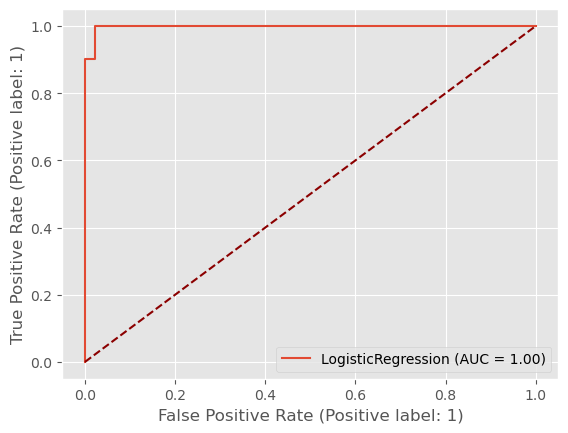

In [27]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr,X_test,y_test)
plt.plot([0,1],[0,1],color="darkred",linestyle="--")
plt.show()

Se observa un área bajo la curva AUC del 100%, la efectividad del modelo es bastante bueno!

#### KNN Clasification

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Encontramos los mejores vecinos

no_of_neighbors_and_accuracies = {}
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    Y_knn = knn.predict(X_test)
    score = accuracy_score(Y_knn,y_test)
    no_of_neighbors_and_accuracies[i] = score

In [29]:
no_of_neighbors_and_accuracies

{1: 0.9210526315789473,
 2: 0.9385964912280702,
 3: 0.956140350877193,
 4: 0.956140350877193,
 5: 0.956140350877193,
 6: 0.956140350877193,
 7: 0.956140350877193,
 8: 0.9649122807017544,
 9: 0.9649122807017544,
 10: 0.9649122807017544,
 11: 0.956140350877193,
 12: 0.956140350877193,
 13: 0.956140350877193,
 14: 0.956140350877193}

Se observa que a partir de **k=3** el accuracy no mejora significativamente, por lo que dicho valor es el óptimo!

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
#Entrenamiento
knn.fit(X_train,y_train)
#Predicciones
Y_knn = knn.predict(X_test)

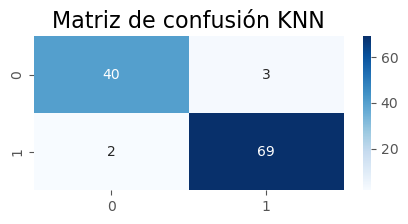

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize=(5,2))
plt.title("Matriz de confusión KNN", fontsize=16)
sns.heatmap(confusion_matrix(y_test,Y_knn),annot=True,
           cmap="Blues",fmt=".0f")
plt.show();

Los que se han clasificado como Benigno (1) cuando en realidad eran malignos (0) es 3 observaciones

In [60]:
precision_knn = precision_score(y_test,Y_knn)
print("Precisión del modelo KNN:")
print(precision_knn)

Precisión del modelo KNN:
0.9583333333333334


* Curva ROC para el modelo de KNN

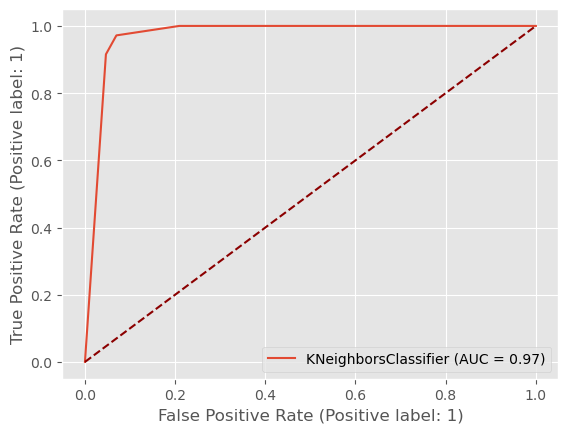

In [33]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn,X_test,y_test)
plt.plot([0,1],[0,1],color="darkred",linestyle="--")
plt.show()

#### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
ar = DecisionTreeClassifier()

# Entrenamos el modelo
ar.fit(X_train,y_train)

# Predicciones
Y_ar = ar.predict(X_test)

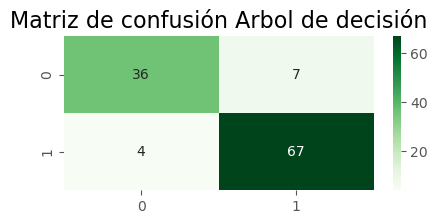

In [35]:
plt.figure(figsize=(5,2))
plt.title("Matriz de confusión Arbol de decisión", fontsize=16)
sns.heatmap(confusion_matrix(y_test,Y_ar),annot=True,
           cmap="Greens",fmt=".0f")
plt.show();

In [61]:
precision_ar = precision_score(y_test,Y_ar)
print("Precisión del modelo CART:")
print(precision_ar)

Precisión del modelo CART:
0.9054054054054054


#### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Entrenamos el modelo
rf.fit(X_train,y_train)

# Predicciones
Y_rf = rf.predict(X_test)

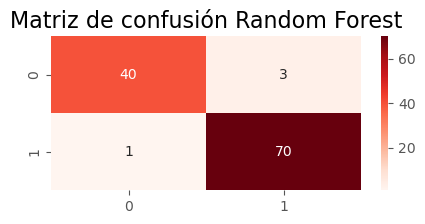

In [38]:
plt.figure(figsize=(5,2))
plt.title("Matriz de confusión Random Forest", fontsize=16)
sns.heatmap(confusion_matrix(y_test,Y_rf),annot=True,
           cmap="Reds",fmt=".0f")
plt.show();

In [90]:
confusionmatrix = np.around(confusion_matrix(y_test, Y_rf),3)
#Plotting the Confusion Matrix
fig = px.imshow(confusionmatrix,
                width=700, height=400,
                template='ggplot2',
                text_auto=True,
                title="Matriz de confusión Random Forest",
                aspect="auto", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

Los que se han clasificado como Benigno (1) cuando en realidad es maligno son 3 registros, los que se han clasificado como maligno cuando en realidad son benignos es 1 registro. En general, cuen desempeño!

In [62]:
precision_rf = precision_score(y_test,Y_rf)
print("Precisión del modelo Random Forest:")
print(precision_rf)

Precisión del modelo Random Forest:
0.958904109589041


#### Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

# Entrenamos el modelo
gbc.fit(X_train,y_train)

# Predicciones
Y_gbc = gbc.predict(X_test)

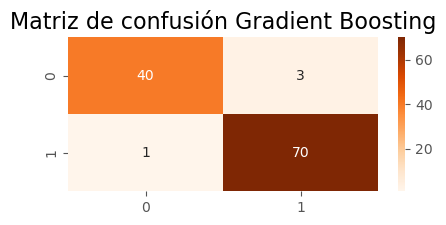

In [41]:
plt.figure(figsize=(5,2))
plt.title("Matriz de confusión Gradient Boosting", fontsize=16)
sns.heatmap(confusion_matrix(y_test,Y_gbc),annot=True,
           cmap="Oranges",fmt=".0f")
plt.show();

In [63]:
precision_gb = precision_score(y_test,Y_gbc)
print("Precisión del modelo Gradient Boosting:")
print(precision_gb)

Precisión del modelo Gradient Boosting:
0.958904109589041


#### Stochastic Gradient Decent

In [43]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()

# Entrenamos el modelo
sgdc.fit(X_train,y_train)

# Predicciones
Y_sgdc = sgdc.predict(X_test)

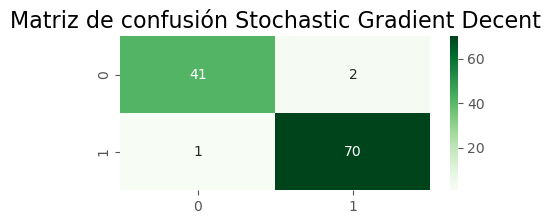

In [44]:
plt.figure(figsize=(5,2))
plt.title("Matriz de confusión Stochastic Gradient Decent", fontsize=16)
sns.heatmap(confusion_matrix(y_test,Y_sgdc),annot=True,
           cmap="Greens",fmt=".0f")
plt.show();

In [64]:
precision_st = precision_score(y_test,Y_sgdc)
print("Precisión del modelo Stochastic Gradient Decent:")
print(precision_st)

Precisión del modelo Stochastic Gradient Decent:
0.9722222222222222


Muy buen desempeño !

#### XGBoost

In [ ]:
#### SE DEBE DESCARGAR PAQUETE xgboost!!!!!!!!!!!
#from xgboost import XGBClassifier
#xg = XGBClassifier()

# Entrenamos el modelo
#xg.fit(X_train,y_train)

# Predicciones
#Y_xg = xg.predict(X_test)

#### Redes Neuronales

In [46]:
import tensorflow as tf 

In [47]:
from tensorflow.keras.layers import Dropout

In [50]:
# CREATING THE ANN AS SEQUENCE OF LAYERS
ann = tf.keras.models.Sequential()

# ADDING FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYER WILL BE ADD AUTO
ann.add(tf.keras.layers.Dense(units=30,activation="relu"))
ann.add(Dropout(0.5)) #CAPA 1 LISTA

# ADDING 2ND HIDDEN LAYER WITH 30 NEURONS
ann.add(tf.keras.layers.Dense(units=30,activation="relu")) #CAPA 2 LISTA

# ADDING OUTPUT LAYER WITH 1 NEURON. AS THIS IS BINARY CLASSIFICATION
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid")) #NEURON SALIDA

# Compiling the ann using stochastic gradient decent (Optimizer = "adam")
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [52]:
# Setting callbacks for monitoring maximum accuracy
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(monitor="accuracy",mode="max",patience=25)

In [54]:
# TRAINING THE ANN WITH BATCH SIZE OF 32(THIS IS A BATCH LEARNING)
ann.fit(X_train,y_train,batch_size=32,epochs=400,callbacks=[early])

Epoch 1/400
15/15 [==============================] - 1s 1ms/step - loss: 0.5407 - accuracy: 0.7648
Epoch 2/400
15/15 [==============================] - 0s 1ms/step - loss: 0.3658 - accuracy: 0.9033
Epoch 3/400
15/15 [==============================] - 0s 2ms/step - loss: 0.2895 - accuracy: 0.9209
Epoch 4/400
15/15 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 0.9407
Epoch 5/400
15/15 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9319
Epoch 6/400
15/15 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9451
Epoch 7/400
15/15 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.9363
Epoch 8/400
15/15 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9495
Epoch 9/400
15/15 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9495
Epoch 10/400
15/15 [==============================] - 0s 2ms/step - loss: 0.1331 - accuracy: 0.9626
Epoch 11/

15/15 [==============================] - 0s 5ms/step - loss: 0.0312 - accuracy: 0.9912
Epoch 84/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9890
Epoch 85/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.9868
Epoch 86/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0301 - accuracy: 0.9868
Epoch 87/400
15/15 [==============================] - 0s 6ms/step - loss: 0.0257 - accuracy: 0.9934
Epoch 88/400
15/15 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9824
Epoch 89/400
15/15 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9890
Epoch 90/400
15/15 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9890
Epoch 91/400
15/15 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9890
Epoch 92/400
15/15 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9912
Epoch 93/400


<AxesSubplot:>

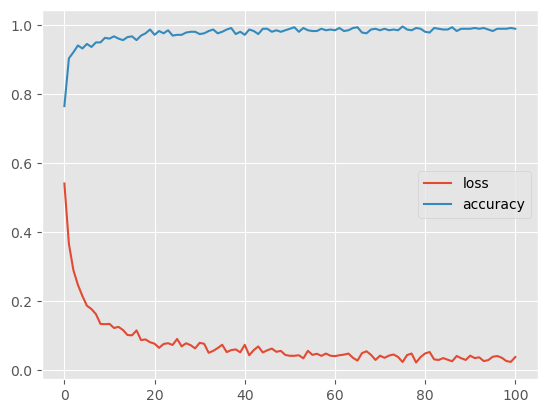

In [55]:
losses = pd.DataFrame(ann.history.history)
losses.plot()

Se logra observar la función de pérdida y la función de precisión. A medida que la precisión aumenta va convergiendo a 1, la pérdida va aumentando.

In [56]:
#PREDICCIONES
Y_ann = ann.predict(X_test)
Y_ann = Y_ann > 0.5

4/4 [==============================] - 0s 0s/step


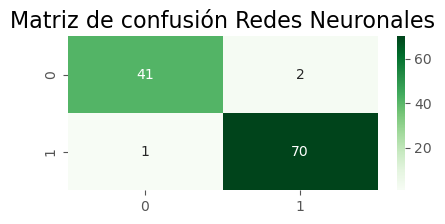

In [57]:
plt.figure(figsize=(5,2))
plt.title("Matriz de confusión Redes Neuronales", fontsize=16)
sns.heatmap(confusion_matrix(y_test,Y_ann),annot=True,
           cmap="Greens",fmt=".0f")
plt.show();

In [65]:
precision_ann = precision_score(y_test,Y_ann)
print("Precisión del modelo Redes Neuronales:")
print(precision_ann)

Precisión del modelo Redes Neuronales:
0.9722222222222222


## RESULTADOS

In [66]:
models = pd.DataFrame({
    "Model":["Logistic Regression","KNN","Decision tree","Random Forest",
            "Gradient Boosting","Stochastic Gradient Decent","Neural Networks"],
    
    "Accuracy": [precision_lr,precision_knn,precision_ar,precision_rf,
                precision_gb,precision_st,precision_ann]
})
models.sort_values(by="Accuracy",ascending=False)

,Model,Accuracy
0,Logistic Regression,0.972603
5,Stochastic Gradient Decent,0.972222
6,Neural Networks,0.972222
3,Random Forest,0.958904
4,Gradient Boosting,0.958904
1,KNN,0.958333
2,Decision tree,0.905405


El mejor rendimiento fue obtenido por la **REGRESIÓN LOGÍSTICA**

## Visualización de resultados:

In [67]:
import plotly.express as px

In [70]:
fig = px.bar (models, x="Model",
             y="Accuracy",
             template="simple_white",
             color_discrete_sequence=["RebeccaPurple","blue"],
             title="Accuracy de los Modelos")
fig.show()

## PREDICCION CON DATO RANDOM

In [74]:
paciente = pd.DataFrame({"num1":[17.98,10.38,122.80,1001.0,0.11840,0.27760,
                                0.3001,0.14710,0.2419,0.7871,1.0950,0.9053,
                                8.589,153.40,0.006399,0.04904,0.05373,0.01587,
                                0.03003,0.006193,25.38,17.33,184.60,2019.0,
                                 0.1622,0.6656,0.7119,0.2654,0.4601,0.11890]})
paciente

,num1
0,17.980000
1,10.380000
2,122.800000
3,1001.000000
4,0.118400
5,0.277600
6,0.300100
7,0.147100
8,0.241900
9,0.787100


In [72]:
scale_paciente = scaler.fit_transform(paciente.T)

In [73]:
lr.predict(scale_paciente)

array([1])

La predicción señala que el paciente en particular es **Benigno**